### Import Dependencies

In [7]:
import numpy as np 
import pandas as pd

from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

### Read Dataset

In [8]:
data = pd.read_csv('../data.csv')
data.drop('Index', axis=1, inplace=True)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,459,460,461,462,463,464,465,466,467,label
0,0.156041,0.034724,0.071444,0.078117,0.0,0.043656,0.147673,0.290654,0.227140,0.271585,...,0.063550,0.104668,0.057380,0.062866,0.189442,0.170856,0.159821,0.323322,0.348375,0
1,0.099105,0.033467,0.048210,0.096153,0.0,0.050459,0.181863,0.332776,0.276899,0.323902,...,0.061139,0.101462,0.051161,0.050882,0.230257,0.214284,0.201468,0.353529,0.377521,0
2,0.160259,0.033538,0.105772,0.086060,0.0,0.046421,0.181095,0.224147,0.273403,0.312137,...,0.071666,0.147298,0.067166,0.087085,0.274896,0.251641,0.229446,0.382837,0.408696,0
3,0.139705,0.035719,0.060722,0.098022,0.0,0.051891,0.187796,0.330197,0.296981,0.350095,...,0.063510,0.106100,0.055346,0.057549,0.232088,0.215398,0.203230,0.354787,0.383226,0
4,0.144930,0.030739,0.065995,0.082237,0.0,0.041594,0.145923,0.312308,0.210267,0.247076,...,0.035856,0.051338,0.042271,0.047047,0.154600,0.146428,0.139789,0.194182,0.204608,0


### Split Variables

In [9]:
x = data.iloc[:, :-1]
y = data.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

### Training

In [10]:

knn = KNeighborsClassifier(metric='euclidean', n_neighbors=19, weights='distance')
knn.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=19, weights='distance')

In [11]:
pred = knn.predict(x_test)

In [12]:
accuracy_score(y_test, pred)

0.4643076923076923

### Get the confusion matrix

In [13]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

confusion_matrix(y_test, pred)

array([[ 181,   67,  210,  215,  112,   56],
       [  42,  209,  184,  220,  157,   94],
       [  61,   70, 1245,  185,  109,   71],
       [  51,   87,  223,  603,  195,   40],
       [  70,  102,  202,  324,  340,   37],
       [  22,   53,   87,  105,   31,  440]], dtype=int64)

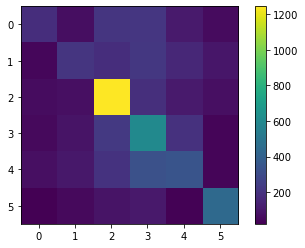

In [14]:
plt.imshow(confusion_matrix(y_test, pred))
plt.colorbar()

### Get the recall 

In [15]:
from sklearn.metrics import recall_score
recall_score(y_test, pred, average=None)

array([0.21521998, 0.23068433, 0.71510626, 0.5029191 , 0.31627907,
       0.59620596])

### Get Precision

In [16]:
from sklearn.metrics import precision_score
precision_score(y_test, pred, average=None)

array([0.42388759, 0.35544218, 0.57880056, 0.36501211, 0.36016949,
       0.59620596])

### F1 score

In [17]:
from sklearn.metrics import f1_score
f1_score(y_test, pred, average=None)

array([0.28548896, 0.27978581, 0.6397739 , 0.42300947, 0.3368004 ,
       0.59620596])